### **FUNCTIONS and Packages**

In [ ]:
def dataSplit(tup):
    n = len(tup)
    return tup[0 : (n - 1)]

def labelSplit(tup):
    n = len(tup)
    return tup[n - 1]

# get word from dictionary ID
def getWord(d, i):
    return list(d.keys())[list(d.values()).index(i)]

#this function generates random numbers for the secret
def generateSecret(length, size):
    secret = ""
    for i in range(length):
        a = randint(0, size)
        if a < 10:
            a = "0" + str(a)
        a = str(a)
        secret = secret + a + " "
    
    return secret[:-1]

#allows us to add every secret permutation to the "test" data set, allowing us to see what probability the model assigns to every value of r
def enumerateSecrets(length, size, rid, pref):
    d = []
    
    if length == 1:
        for i in range(size):
            a = pref + str(i)
            d.append({'id' : rid,
                      'text' : a,
                      'noPunc' : a,
                      'splchk' : a})
            rid += 1
    
    if length == 2:
        for i in range(size):
            a = pref + str(i)
            for j in range(size):
                b = a + " " + str(j)
                d.append({'id' : rid,
                          'text' : b,
                          'noPunc' : b,
                          'splchk' : b})
                rid += 1
                
    return d, rid

def numericProbs(x, size, dictionary, gramSize, model, index): 
  #for gramsize then we give seqLength to the function
    xn = np.zeros((1, gramSize), dtype = float)
    for k in range(gramSize):
      # this produce one vector of size 4 in our case (seqlength) and fill it with values of xt for the index we specify
        xn[0][k] = x[index][k]

#this p0 returns a vector the same size as dict and give prob for the next word among these words in dict
    p0 = model.predict(xn)[0]
    
 #here we create numericprobs vec which is vector of length 100 which is the numbers that we can have in random secret
    numericProbs = np.zeros((size), dtype = float)
    
    for j in range(size):
        a = str(j)
        #here we will find each number's value between 0 to 99 in the dct and then we will find its prob in p0 to be the next predicted word
#         # so in numeric probs we have a vector of length 100 and probs for each number to be the next word
        numericProbs[j] = p0[dictionary[a]]
        
    return numericProbs

In [ ]:
#cleaning
import numpy as np
import re
from random import randint

def cleanSMS(sms):
    
    # leetspeak
    sms = re.sub("[\.,]", " ", sms)
    sms = re.sub(" {2,}", " ", sms)
    sms = re.sub(" 2 ", " to ", sms)
    sms = re.sub(" 4 | fr ", " for ", sms)
    
    sms = re.sub(" abt ", " about ", sms)
    sms = re.sub(" aft ", " after ", sms)
    sms = re.sub(" ard ", " around ", sms)
    
    sms = re.sub(" ar ", " all right ", sms)
    sms = re.sub(" ar$", " all right", sms)
    
    sms = re.sub(" b ", " be ", sms)
    sms = re.sub(" bcz ", " because ", sms)
    sms = re.sub(" bday ", " birthday", sms)
    sms = re.sub(" brin ", " bring ", sms)
    
    sms = re.sub(" btw ", " by the way ", sms)
    sms = re.sub(" btw$", " by the way", sms)
    
    sms = re.sub(" buk ", " book ", sms)
    
    sms = re.sub(" c ", " see ", sms)
    sms = re.sub("^c ", "see ", sms)
    
    sms = re.sub(" coz | cuz | cos ", " cause ", sms)
    sms = re.sub("^coz |^cuz |^cos ", "cause ", sms)
    
    sms = re.sub(" da ", " the ", sms)
    sms = re.sub(" dat ", " that ", sms)
    
    sms = re.sub(" den ", " then ", sms)
    sms = re.sub("^den ", "then ", sms)
    sms = re.sub(" den$", " then", sms)
    
    sms = re.sub(" dint? ", " did not ", sms)
    
    sms = re.sub(" dis ", " this ", sms)
    sms = re.sub(" dis$", " this", sms)
    
    sms = re.sub(" dem | dm ", " them ", sms)
    sms = re.sub(" dey ", " they ", sms)
    sms = re.sub("^dey ", "they ", sms)
    sms = re.sub(" dnt ", " do not ", sms)
    
    sms = re.sub(" dun | don ", " do not ", sms)
    sms = re.sub("^dun |^don ", "do not ", sms)
    sms = re.sub(" dun$| don$", " do not", sms)
    
    sms = re.sub(" e ", " the ", sms)
    sms = re.sub(" esp " , " especially ", sms)
    sms = re.sub(" enuff ", " enough ", sms)
    sms = re.sub(" frens ", " friends ", sms)
    
    sms = re.sub(" fren " , " friend ", sms)
    sms = re.sub(" fren$", " fren", sms)
    
    sms = re.sub(" frm ", " from ", sms)
    
    sms = re.sub(" gd ", " good ", sms)
    sms = re.sub("^gd ", "good ", sms)
    sms = re.sub(" gd$", " good", sms)
    
    sms = re.sub(" gn ", " good night ", sms)
    sms = re.sub("^gn ", "good night ", sms)
    sms = re.sub(" gn$", " good night", sms)
    
    sms = re.sub("^hai ", "hey ", sms)
    
    sms = re.sub(" haf | hv | hav ", " have ", sms)
    sms = re.sub(" haf$| hv$| hav$", " have", sms)
    
    sms = re.sub(" haven ", " have not ", sms)
    
    sms = re.sub(" hse ", " house ", sms)
    sms = re.sub(" hse$", " house", sms)
    sms = re.sub(" hw ", " homework ", sms)
    sms = re.sub("^hw ", "how ", sms)
    
    sms = re.sub(" i ll ", " i will ", sms)
    sms = re.sub("^i ll ", "i will ", sms)
    sms = re.sub(" i ve ", " i have ", sms)
    sms = re.sub("^i ve ", "i have ", sms)
    
    sms = re.sub(" juz | jus | jos ", " just ", sms)
    sms = re.sub("^juz |^jus |^jos ", "just ", sms)
    
    sms = re.sub("kd ", "ked ", sms)
    sms = re.sub(" knw ", " know ", sms)
    
    sms = re.sub(" lar | lter ", " later ", sms)
    sms = re.sub(" lar$| lter$", " later", sms)
    sms = re.sub("^lar |^lter ", "later ", sms)
    
    sms = re.sub(" lib ", " library ", sms)
    sms = re.sub(" lib$", " library", sms)
    
    sms = re.sub(" lect ", " lecture ", sms)
    sms = re.sub("^ll ", "i will ", sms)
    sms = re.sub(" lyk ", " like ", sms)
    sms = re.sub(" m ", " am ", sms)
    sms = re.sub("^m ", "i am ", sms)
    sms = re.sub(" mayb ", " maybe ", sms)
    sms = re.sub(" meh ", " me ", sms)
    sms = re.sub(" msg ", " message ", sms)
    sms = re.sub(" neva ", " never ", sms)
    sms = re.sub(" mum ", " mom ", sms)
    sms = re.sub(" muz ", " must ", sms)
    sms = re.sub(" n ", " and ", sms)
    sms = re.sub("nd ", "ned ", sms)
    sms = re.sub(" nite ", " night ", sms)
    sms = re.sub(" noe ", " know ", sms)
    
    sms = re.sub(" nt ", " not ", sms)
    sms = re.sub("^nt ", "not ", sms)
    
    sms = re.sub(" nvm ", " never mind ", sms)
    sms = re.sub(" nvr ", " never ", sms)
    sms = re.sub(" nw ", " now ", sms)
    
    sms = re.sub(" nxt ", " next ", sms)
    sms = re.sub("^nxt ", "next ", sms)
    
    sms = re.sub(" okie | ok | k ", " okay ", sms)
    sms = re.sub("^okie |^ok |^k ", "okay ", sms)
    sms = re.sub(" okie$| ok$| k$", " okay", sms)
    
    sms = re.sub(" oredi | alr ", " already ", sms)
    sms = re.sub(" oredi$| alr$", " already", sms)
    
    sms = re.sub(" oso ", " also ", sms)
    
    sms = re.sub(" plz ", " please ", sms)
    sms = re.sub("^plz ", "please ", sms)
    sms = re.sub(" plz$", " please", sms)
    
    sms = re.sub(" pple? ", " people ", sms)
    
    sms = re.sub(" pg ", " page ", sms)
    sms = re.sub(" pg$", " page", sms)
    
    sms = re.sub(" r ", " are ", sms)
    sms = re.sub("^r ", "are ", sms)
    sms = re.sub(" r$", " are", sms)
    
    sms = re.sub(" rem ", " remember ", sms)
    sms = re.sub(" rite ", " right ", sms)
    
    sms = re.sub(" rly ", " really ", sms)
    sms = re.sub("^rly ", "really ", sms)
    sms = re.sub(" rly$", " really", sms)
    
    sms = re.sub(" ru ", " are you ", sms)
    sms = re.sub(" s ", " is ", sms)
    sms = re.sub("^s ", "its ", sms)
    
    sms = re.sub(" sch ", " school ", sms)
    sms = re.sub(" sch$", " school", sms)
    
    sms = re.sub(" shd | shld ", " should ", sms)
    sms = re.sub(" slp ", " sleep ", sms)
    
    sms = re.sub(" sme", " some", sms)
    sms = re.sub("^sme", "some", sms)
    
    sms = re.sub(" smth ", " something ", sms)
    
    sms = re.sub(" tat ", " that ", sms)
    sms = re.sub("^tat ", "that ", sms)
    sms = re.sub(" tat$", " that", sms)
    
    sms = re.sub(" tmr | tml ", " tomorrow ", sms)
    sms = re.sub("^tmr |^tml ", "tomorrow ", sms)
    sms = re.sub(" tmr$| tml$", " tomorrow", sms)
    
    sms = re.sub(" thanx ", " thanks ", sms)
    sms = re.sub(" thanx$", " thanks", sms)
    sms = re.sub("^thanx ", "thanks ", sms)
    
    sms = re.sub(" thgt ", " thought ", sms)
    sms = re.sub(" thk | thnk ", " think ", sms)
    sms = re.sub(" tis ", " this ", sms)
    sms = re.sub(" tot " , " thought ", sms)
    sms = re.sub(" ttyl$", " talk to you later", sms)
    
    sms = re.sub(" tym ", " time ", sms)
    sms = re.sub(" tym", " time", sms)
    
    sms = re.sub(" [uüü] ", " you ", sms)
    sms = re.sub("^[uüü] ", "you ", sms)
    sms = re.sub(" [uüü]$", " you", sms)
    
    sms = re.sub(" ur ", " your ", sms)
    sms = re.sub(" v ", " very ", sms)
    sms = re.sub(" vil ", " will ", sms)
    sms = re.sub("^ve ", "i have ", sms)
    sms = re.sub(" wan ", " want ", sms)
    sms = re.sub(" w ", " with ", sms)
    
    sms = re.sub(" wana ", " wanna ", sms)
    sms = re.sub("^wana ", "wanna ", sms)
    
    sms = re.sub(" wat ", " what ", sms)
    sms = re.sub("^wat ", "what ", sms)
    sms = re.sub(" wat$", " what", sms)
    
    sms = re.sub(" wen ", " when ", sms)
    sms = re.sub("^wen ", "when ", sms)
    
    sms = re.sub(" wif | wid | wth ", " with ", sms)
    sms = re.sub("^wif |^wid |^wth ", "with ", sms)
    sms = re.sub(" wif$| wid$| wth$", " with", sms)
    
    sms = re.sub(" wk ", " week ", sms)

    sms = re.sub(" wun ", " wont ", sms)
    
    sms = re.sub(" y ", " why ", sms)
    sms = re.sub("^y ", "why ", sms)
    sms = re.sub(" y$", " why", sms)
    
    sms = re.sub("yup", "yep", sms)

    # remove laughter and smiles
    sms = re.sub(" d ", " ", sms)
    sms = re.sub(" d$", "", sms)
    sms = re.sub("^d ", "", sms)
    sms = re.sub(" ha ", " ", sms)
    sms = re.sub("^ha ", "", sms)
    sms = re.sub(" ha$, ", "", sms)
    sms = re.sub(" lor ", " ", sms)
    sms = re.sub(" lor$", "", sms)
    sms = re.sub(" lols? ", " ", sms)
    sms = re.sub("^lols? ", "", sms)
    sms = re.sub(" lols?$", "", sms)
    sms = re.sub("a*(ha){2,}h*", "", sms)
    sms = re.sub(" hee ", " ", sms)
    sms = re.sub("^hee ", "", sms)
    sms = re.sub(" hee$", "", sms)
    
    # remove words I don't understand
    sms = re.sub(" lei ", " ", sms)
    sms = re.sub("^lei ", " ", sms)
    sms = re.sub(" lei$", " ", sms)
    
    # standardize most '-ing' to '-in'
    sms = re.sub("(?<=[bdfghklmnoprstvwy])ing(?= )", "in", sms)
    sms = re.sub("(?<=[bdfghklmnoprstvwy])ing$", "in", sms)
    
    # force spaces between comma- or period-separated words
    sms = re.sub("(?<=[^ ])[\.,](?=[^ ])", " ", sms)
    
    return sms


In [ ]:
import sys, os, random
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
from nltk import ngrams
from math import log

import sys
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding



###**SMS DATA** -- statistics for presentation

statistics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
#Read data and clean it
f = open('/content/drive/MyDrive/Colab Notebooks/smsCorpus_en_2015.03.09_all.json')
data = json.load(f)
listofDict = data['smsCorpus']['message']
fullData = pd.DataFrame(listofDict)
dataRaw = fullData[['@id','text']]
dataRaw = pd.DataFrame(dataRaw)
dataRaw.rename(columns = {'@id':'id'}, inplace = True)
dataRaw['text'] = dataRaw['text'].astype("str")
dataRaw['text'] = dataRaw['text'].map(lambda x: x.lstrip("{'$':-").rstrip("-'}"))
dataRaw['text'] = dataRaw['text'].str.replace(r"'", "")
dataRaw.head()

,id,text
0,10120,Bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only..."
2,10122,I dunno until when... Lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz.....
4,10124,Meet after lunch la...


In [ ]:
dataRaw.shape

(55835, 2)

In [ ]:
dataRaw['vocabsplit'] = dataRaw.text.str.split()

In [ ]:
dataRaw['vocablen'] = 0
for i in range(len(dataRaw)):
  dataRaw['vocablen'][i] = len(dataRaw['vocabsplit'][i])

<ipython-input-8-efeec00d9e1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRaw['vocablen'][i] = len(dataRaw['vocabsplit'][i])


In [ ]:
max(dataRaw['vocablen'])

178

In [ ]:
min(dataRaw['vocablen'])

0

In [ ]:
dataRaw['vocablen'].value_counts()

3      4421
4      4275
5      4165
2      4108
1      4083
       ... 
145       1
0         1
162       1
143       1
117       1
Name: vocablen, Length: 121, dtype: int64

In [ ]:
from numpy.core.fromnumeric import mean
mean(dataRaw['vocablen'])

10.410602668577058

Text(0, 0.5, 'Frequency')

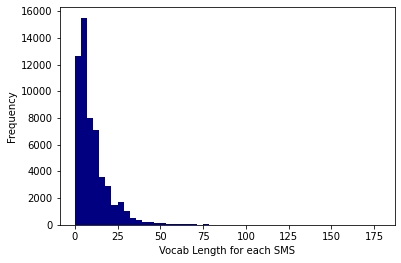

In [ ]:
# get length of all the messages in the train set
import numpy as np
import matplotlib.pyplot as plt
seq_len = [len(i.split()) for i in dataRaw['text']]
plt.hist(pd.Series(seq_len),bins = 50, color = "navy")
plt.xlabel('Vocab Length for each SMS')
plt.ylabel('Frequency')
#pd.Series(seq_len).hist(bins = 50, color = "navy")


### **Data and Cleaning Process**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**SMS data - Cleaning Process**

In [ ]:
import json
#Read data and clean it
f = open('/content/drive/MyDrive/Colab Notebooks/smsCorpus_en_2015.03.09_all.json')
data = json.load(f)
listofDict = data['smsCorpus']['message']
fullData = pd.DataFrame(listofDict)
dataRaw = fullData[['@id','text']]
dataRaw = pd.DataFrame(dataRaw)
dataRaw.rename(columns = {'@id':'id'}, inplace = True)
dataRaw['text'] = dataRaw['text'].astype("str")
dataRaw['text'] = dataRaw['text'].map(lambda x: x.lstrip("{'$':-").rstrip("-'}"))
dataRaw['text'] = dataRaw['text'].str.replace(r"'", "")
dataRaw.head()

,id,text
0,10120,Bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only..."
2,10122,I dunno until when... Lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz.....
4,10124,Meet after lunch la...


In [ ]:
dataRaw.shape

(55835, 2)

In [ ]:
#use a portion of data the whole data will cause colab crash
dataRaw = dataRaw[:30000]
rootId = len(dataRaw)

In [ ]:
#cleaning
myPunc = '!"#$%&\()*+-/:;<=>?@[\\]^_`{|}~\''
dataRaw['noPunc'] = dataRaw['text'].apply(
        lambda s: s.translate(str.maketrans('','', myPunc)).lower()
        )

dataRaw['splchk'] = dataRaw['noPunc'].apply(cleanSMS)

<ipython-input-18-93d043b43abc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRaw['noPunc'] = dataRaw['text'].apply(


In [ ]:
#cleaning
dataRaw['splchk'] = dataRaw['noPunc'].apply(cleanSMS)
dataRaw['splchk'] = dataRaw['splchk'].apply(cleanSMS)

In [ ]:
#partitioning train, validation, test
random.seed(10)
#we have 20% of the whole data known as dataRaw for test and it is knwon as dataRawT
#then the othe 80% is known as dataRawR will soon split to valid and train
mskTrain = np.random.rand(len(dataRaw)) < 0.8
dataRawR = dataRaw[mskTrain]
dataRawT = dataRaw[~mskTrain]

# train-validation split
mskVal = np.random.rand(len(dataRawR)) < 0.8
#Here from the left 80% of the data in dataRawR we have 80% for training known as dataRawR and 20% for validation known as dataRawV
dataRawV = dataRawR[~mskVal]
dataRawR = dataRawR[mskVal]

### exposure with no secret in the train set -- BASELINE

In [ ]:
  # 0. EXPERIMENTAL SETUP ====================================

  # how many copies of the secret do we insert?
  numTrueSecrets = 0
  # how many 'noisy' secrets do we insert?
  numFalseSecrets = 0
  # how many ticks are on our lock?
  numDistinctValues = 100
  # how long should we train the model?
  numEpochs = 5
  batchSize = 256

  # what form should the secret take?
  secretPref = "my permanent code is "
  seqLength = len(secretPref.split())
  gramSize = seqLength + 1

  # randomness space
  secretLength = 2
  bigR = numDistinctValues ** secretLength

  # generate a random secret
  secretText = generateSecret(secretLength, numDistinctValues)
  insertedSecret = secretPref + secretText

  print("\n+---------------------------------------+")
  print("| THANK YOU FOR USING THE SECRET SHARER |")
  print("+---------------------------------------+\n")
  print(" True secrets inserted:", numTrueSecrets)
  print(" False secrets inserted:", numFalseSecrets)
  print(" Randomness space:", numDistinctValues)
  print(" Training epochs:", numEpochs)
  print(" Batch size:", batchSize)
  print(" Secret text: '", insertedSecret, "'\n", sep = '')
  print("-----------------------------------------")
  print("\npreparing data...")


+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 0
 False secrets inserted: 0
 Randomness space: 100
 Training epochs: 5
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

# d = []
# # several in training data
# for i in range(numTrueSecrets):
#     d.append({'id' : rootId,
#               'text' : insertedSecret,
#               'noPunc' : insertedSecret,
#               'splchk' : insertedSecret})
#     rootId += 1
# #truesecrets add in train data
# trainSecret = pd.DataFrame(d)
#dataRawR = dataRawR.append(d)

#also the noise is added to train set
# if numFalseSecrets > 0:
#     dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
dataGramsT

,id,data
0,161840,"(hey, people, 700, or, 900)"
1,161841,"(people, 700, or, 900, for)"
2,161842,"(700, or, 900, for, 5)"
3,161843,"(or, 900, for, 5, nights)"
4,161844,"(900, for, 5, nights, excellent)"
...,...,...
60512,222352,"(permanent, code, is, 99, 97)"
60513,222353,"(my, permanent, code, is, 99)"
60514,222354,"(permanent, code, is, 99, 98)"
60515,222355,"(my, permanent, code, is, 99)"


In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


<ipython-input-115-173b97ba434e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
<ipython-input-115-173b97ba434e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
<ipython-input-115-173b97ba434e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


<ipython-input-116-8573288be9a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
<ipython-input-116-8573288be9a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)
<ipython-input-116-8573288be9a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1
#np.save('b.npy', b)
#from google.colab import files
# !cp b.npy "/content/drive/MyDrive"
#b = np.load('b.npy')

In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1
# np.save('bv.npy', bv)
# from google.colab import files
# !cp bv.npy "/content/drive/MyDrive"
#bv = np.load('bv.npy')

In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/5
415/415 [==============================] - 12s 20ms/step - loss: 6.9566 - accuracy: 0.0400 - val_loss: 6.7413 - val_accuracy: 0.0401
Epoch 2/5
415/415 [==============================] - 6s 14ms/step - loss: 6.6520 - accuracy: 0.0420 - val_loss: 6.7566 - val_accuracy: 0.0401
Epoch 3/5
415/415 [==============================] - 5s 13ms/step - loss: 6.6240 - accuracy: 0.0420 - val_loss: 6.7325 - val_accuracy: 0.0402
Epoch 4/5
415/415 [==============================] - 5s 13ms/step - loss: 6.5396 - accuracy: 0.0431 - val_loss: 6.6385 - val_accuracy: 0.0433
Epoch 5/5
415/415 [==============================] - 6s 14ms/step - loss: 6.4065 - accuracy: 0.0476 - val_loss: 6.5755 - val_accuracy: 0.0481


In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

887/887 - 4s - loss: 6.5755 - accuracy: 0.0481 - 4s/epoch - 4ms/step
Accuracy: 4.81%


In [ ]:
import joblib
joblib.dump(model, 'RQ1-200sec.sav')

['RQ1-200sec.sav']

###**SetUp data split and training**

###**RQ1-RQ2**

In this research question we want to see if the model is going to memorize secrets and we want to compute the average exposure. For that we will insert the same secret different number of times and average the value of exposure and report that for average exposure of the model. 

In [ ]:
random.seed(10)

In [ ]:
  # 0. EXPERIMENTAL SETUP ====================================

  # how many copies of the secret do we insert?
  numTrueSecrets = 200
  # how many 'noisy' secrets do we insert?
  numFalseSecrets = 2
  # how many ticks are on our lock?
  numDistinctValues = 100
  # how long should we train the model?
  numEpochs = 5
  batchSize = 256

  # what form should the secret take?
  secretPref = "my permanent code is "
  seqLength = len(secretPref.split())
  gramSize = seqLength + 1

  # randomness space
  secretLength = 2
  bigR = numDistinctValues ** secretLength

  # generate a random secret
  secretText = generateSecret(secretLength, numDistinctValues)
  insertedSecret = secretPref + secretText

  print("\n+---------------------------------------+")
  print("| THANK YOU FOR USING THE SECRET SHARER |")
  print("+---------------------------------------+\n")
  print(" True secrets inserted:", numTrueSecrets)
  print(" False secrets inserted:", numFalseSecrets)
  print(" Randomness space:", numDistinctValues)
  print(" Training epochs:", numEpochs)
  print(" Batch size:", batchSize)
  print(" Secret text: '", insertedSecret, "'\n", sep = '')
  print("-----------------------------------------")
  print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 200
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 5
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
dataGramsR

,id,data
0,0,"(go, until, jurong, point, crazy)"
1,1,"(until, jurong, point, crazy, available)"
2,2,"(jurong, point, crazy, available, only)"
3,3,"(point, crazy, available, only, in)"
4,4,"(crazy, available, only, in, bugis)"
...,...,...
131010,131010,"(permanent, code, is, 73, 04)"
131011,131011,"(my, permanent, code, is, 2)"
131012,131012,"(permanent, code, is, 2, 43)"
131013,131013,"(my, permanent, code, is, 94)"


In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


<ipython-input-47-173b97ba434e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


<ipython-input-48-8573288be9a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
<ipython-input-48-8573288be9a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/5
424/424 [==============================] - 18s 21ms/step - loss: 6.9520 - accuracy: 0.0405 - val_loss: 6.7629 - val_accuracy: 0.0401
Epoch 2/5
424/424 [==============================] - 6s 15ms/step - loss: 6.6470 - accuracy: 0.0416 - val_loss: 6.7631 - val_accuracy: 0.0401
Epoch 3/5
424/424 [==============================] - 6s 15ms/step - loss: 6.6126 - accuracy: 0.0416 - val_loss: 6.7240 - val_accuracy: 0.0402
Epoch 4/5
424/424 [==============================] - 6s 15ms/step - loss: 6.5184 - accuracy: 0.0440 - val_loss: 6.6230 - val_accuracy: 0.0444
Epoch 5/5
424/424 [==============================] - 6s 15ms/step - loss: 6.3371 - accuracy: 0.0502 - val_loss: 6.5531 - val_accuracy: 0.0495


In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

855/855 - 4s - loss: 6.5531 - accuracy: 0.0495 - 4s/epoch - 4ms/step
Accuracy: 4.95%


In [ ]:
import joblib
joblib.dump(model, 'RQ1-200sec.sav')

['RQ1-200sec.sav']

In [ ]:
#import joblib
#loaded_model = joblib.load('smslstmsec1.sav')

###**RQ3**

In this research question we want to see rare secrets and secrets that has been exposed to model more than one time make difference in exposure metric

In [ ]:
random.seed(10)

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 20
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 7
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 20
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 7
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/7
420/420 [==============================] - 15s 16ms/step - loss: 6.9590 - accuracy: 0.0403 - val_loss: 6.7405 - val_accuracy: 0.0424
Epoch 2/7
420/420 [==============================] - 5s 12ms/step - loss: 6.6532 - accuracy: 0.0412 - val_loss: 6.7423 - val_accuracy: 0.0424
Epoch 3/7
420/420 [==============================] - 5s 12ms/step - loss: 6.6151 - accuracy: 0.0412 - val_loss: 6.7039 - val_accuracy: 0.0424
Epoch 4/7
420/420 [==============================] - 5s 12ms/step - loss: 6.5322 - accuracy: 0.0431 - val_loss: 6.6082 - val_accuracy: 0.0462
Epoch 5/7
420/420 [==============================] - 5s 12ms/step - loss: 6.3589 - accuracy: 0.0474 - val_loss: 6.5395 - val_accuracy: 0.0478
Epoch 6/7
420/420 [==============================] - 5s 12ms/step - loss: 6.2267 - accuracy: 0.0508 - val_loss: 6.4992 - val_accuracy: 0.0509
Epoch 7/7
420/420 [==============================] - 5s 12ms/step - loss: 6.1139 - accuracy: 0.0570 - val_loss: 6.4685 - val_accu

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

828/828 - 3s - loss: 6.4685 - accuracy: 0.0594 - 3s/epoch - 4ms/step
Accuracy: 5.94%


In [ ]:
# import joblib
# joblib.dump(model, 'RQ3-20sec.sav')

['RQ3-20sec.sav']

In [ ]:
#import joblib
#loaded_model = joblib.load('smslstmsec1.sav')

###**RQ4**

In this research question we want to see if the model designed with dp-sgd and in secured with differential privacy algorithm, does that change results we have from the RQ1 and does that help the model reduce the unintended memorization? 

In [ ]:
random.seed(10)

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 30
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 5
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 30
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 5
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training

b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
!pip install tensorflow_privacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from absl.testing import parameterized

import numpy as np
import tensorflow as tf

import tensorflow_privacy
from tensorflow_privacy.privacy.keras_models import dp_keras_model

Model with dp

In [ ]:
epochs = 5
batch_size = 256
#maximum euclidean norm. This is for each gradient of the model parameters.  
l2_norm_clip = 1.5
#This parameter is will apply the noise to gradients during training
noise_multiplier = 1.7
num_microbatches = 2
learning_rate = 0.25

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

import numpy as np

tf.get_logger().setLevel('ERROR')

In [ ]:
import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

In [ ]:
model = dp_keras_model.DPSequential(
        l2_norm_clip=l2_norm_clip,
        noise_multiplier=noise_multiplier,
        #num_microbatches=num_microbatches
        )
model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

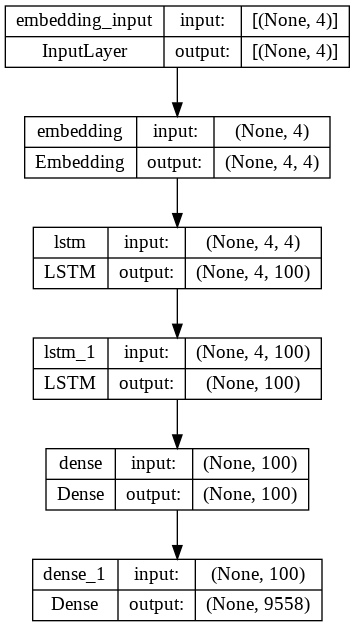

In [ ]:
plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
loss = tf.keras.losses.CategoricalCrossentropy()

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])
model.fit(xr, b, epochs=5, batch_size=256)

Train on 107684 samples
Epoch 1/5
107684/107684 [==============================] - 14s 132us/sample - loss: 7.7150 - acc: 0.0371
Epoch 2/5
107684/107684 [==============================] - 13s 119us/sample - loss: 6.7650 - acc: 0.0349
Epoch 3/5
107684/107684 [==============================] - 11s 104us/sample - loss: 6.7295 - acc: 0.0357
Epoch 4/5
107684/107684 [==============================] - 11s 107us/sample - loss: 6.7132 - acc: 0.0355
Epoch 5/5
107684/107684 [==============================] - 11s 102us/sample - loss: 6.7031 - acc: 0.0371


In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Accuracy: 2.62%


###**RQ5-Glove representation**

In this research question we want to compare different representations, one-hot encoding is defult, then we have fasttext, gloves and word2vec 

In [ ]:
random.seed(10)

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 10
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 7
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 10
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 7
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-12-02 06:05:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-02 06:05:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-02 06:05:38--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

In [ ]:
embeddings_index = dict()
f = open('/content/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
#connect embeding to previous dct
embedding_matrix = np.zeros((vocabSize, 300))
for word, index in dct.items():
    if index > vocabSize - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
#model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(Embedding(vocabSize, 300 ,input_length=seqLength, name="embeddinglayer", weights=[embedding_matrix], trainable=False))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/7
419/419 [==============================] - 11s 19ms/step - loss: 6.8688 - accuracy: 0.0395 - val_loss: 6.6620 - val_accuracy: 0.0431
Epoch 2/7
419/419 [==============================] - 6s 14ms/step - loss: 6.5091 - accuracy: 0.0441 - val_loss: 6.4179 - val_accuracy: 0.0509
Epoch 3/7
419/419 [==============================] - 5s 13ms/step - loss: 6.2133 - accuracy: 0.0583 - val_loss: 6.2504 - val_accuracy: 0.0671
Epoch 4/7
419/419 [==============================] - 5s 12ms/step - loss: 5.9799 - accuracy: 0.0743 - val_loss: 6.1615 - val_accuracy: 0.0801
Epoch 5/7
419/419 [==============================] - 5s 12ms/step - loss: 5.7891 - accuracy: 0.0859 - val_loss: 6.0849 - val_accuracy: 0.0860
Epoch 6/7
419/419 [==============================] - 5s 12ms/step - loss: 5.6177 - accuracy: 0.0949 - val_loss: 6.0535 - val_accuracy: 0.0919
Epoch 7/7
419/419 [==============================] - 5s 12ms/step - loss: 5.4567 - accuracy: 0.1020 - val_loss: 6.0489 - val_accu

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

860/860 - 4s - loss: 6.0489 - accuracy: 0.0965 - 4s/epoch - 4ms/step
Accuracy: 9.65%


In [ ]:
import joblib
joblib.dump(model, 'RQ5-glove rep-3.sav')

['RQ5-glove rep-3.sav']

In [ ]:
#import joblib
#loaded_model = joblib.load('smslstmsec1.sav')

###**RQ5-fasttext representation**

In this research question we want to compare different representations, one-hot encoding is defult, then we have fasttext, gloves and word2vec 

In [ ]:
random.seed(10)

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 10
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 7
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 10
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 7
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip

--2022-12-20 17:58:11--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  22.8MB/s    in 27s     

2022-12-20 17:58:39 (24.1 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [ ]:
embeddings_index = dict()
f = open('/content/wiki-news-300d-1M.vec')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
#connect embeding to previous dct
embedding_matrix = np.zeros((vocabSize, 300))
for word, index in dct.items():
    if index > vocabSize - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
#model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(Embedding(vocabSize, 300 ,input_length=seqLength, name="embeddinglayer", weights=[embedding_matrix], trainable=False))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Train on 107698 samples, validate on 26589 samples
Epoch 1/7
107698/107698 [==============================] - 14s 129us/sample - loss: 6.8968 - acc: 0.0400 - val_loss: 6.6967 - val_acc: 0.0417
Epoch 2/7
107698/107698 [==============================] - 14s 133us/sample - loss: 6.6002 - acc: 0.0424 - val_loss: 6.5899 - val_acc: 0.0445
Epoch 3/7
107698/107698 [==============================] - 14s 129us/sample - loss: 6.3825 - acc: 0.0496 - val_loss: 6.4001 - val_acc: 0.0519
Epoch 4/7
107698/107698 [==============================] - 13s 123us/sample - loss: 6.1419 - acc: 0.0605 - val_loss: 6.2694 - val_acc: 0.0647
Epoch 5/7
107698/107698 [==============================] - 14s 126us/sample - loss: 5.9432 - acc: 0.0745 - val_loss: 6.1867 - val_acc: 0.0778
Epoch 6/7
107698/107698 [==============================] - 14s 133us/sample - loss: 5.7959 - acc: 0.0832 - val_loss: 6.1410 - val_acc: 0.0850
Epoch 7/7
107698/107698 [==============================] - 14s 132us/sample - l

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 8.86%


In [ ]:
# import joblib
# joblib.dump(model, 'RQ5-fasttextrep-3.sav')

###**RQ5-Word2vec representation**

In this research question we want to compare different representations, one-hot encoding is defult, then we have fasttext, gloves and word2vec 

In [ ]:
random.seed(10)

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 10
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 7
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 10
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 7
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


<ipython-input-17-173b97ba434e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

In [ ]:
word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.bin', binary=True)
embedding_matrix = np.zeros((vocabSize, 300))
for word, index in dct.items():
    if index > vocabSize - 1:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[index] = embedding_vector
    except KeyError:
        embedding_matrix[index]=np.random.normal(0,np.sqrt(0.25),300)

embedding_matrix

array([[-0.55777863, -0.24878716,  0.30620998, ...,  0.14174   ,
         1.08523071, -0.60734735],
       [ 0.0534668 ,  0.01202393, -0.00650024, ..., -0.00193787,
         0.03222656, -0.15234375],
       [ 0.09228516, -0.20117188,  0.06933594, ..., -0.00866699,
         0.12890625, -0.21582031],
       ...,
       [ 0.47984287,  0.28908406,  0.157234  , ..., -0.00237308,
         0.13156763, -0.40962329],
       [-0.28840399, -0.15766007,  0.53499768, ...,  0.31022538,
         0.37841475,  0.11110215],
       [-1.43790269,  0.6330718 ,  0.04590014, ...,  1.47957751,
        -0.08169154,  0.23280878]])

In [ ]:
embedding_matrix.shape

(9558, 300)

In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
#model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(Embedding(vocabSize, 300 ,input_length=seqLength, name="embeddinglayer", weights=[embedding_matrix], trainable=False))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/7
417/417 [==============================] - 21s 20ms/step - loss: 6.9041 - accuracy: 0.0398 - val_loss: 6.6896 - val_accuracy: 0.0399
Epoch 2/7
417/417 [==============================] - 5s 12ms/step - loss: 6.5970 - accuracy: 0.0419 - val_loss: 6.5977 - val_accuracy: 0.0414
Epoch 3/7
417/417 [==============================] - 5s 12ms/step - loss: 6.3611 - accuracy: 0.0508 - val_loss: 6.3527 - val_accuracy: 0.0547
Epoch 4/7
417/417 [==============================] - 5s 13ms/step - loss: 6.0804 - accuracy: 0.0656 - val_loss: 6.1961 - val_accuracy: 0.0700
Epoch 5/7
417/417 [==============================] - 5s 12ms/step - loss: 5.8764 - accuracy: 0.0784 - val_loss: 6.1212 - val_accuracy: 0.0807
Epoch 6/7
417/417 [==============================] - 5s 12ms/step - loss: 5.7040 - accuracy: 0.0885 - val_loss: 6.0556 - val_accuracy: 0.0875
Epoch 7/7
417/417 [==============================] - 5s 12ms/step - loss: 5.5458 - accuracy: 0.0965 - val_loss: 6.0462 - val_accu

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

852/852 - 4s - loss: 6.0462 - accuracy: 0.0922 - 4s/epoch - 4ms/step
Accuracy: 9.22%


In [ ]:
import joblib
joblib.dump(model, 'RQ5-word2vec-3.sav')

['RQ5-word2vec-3.sav']

In [ ]:
#import joblib
#loaded_model = joblib.load('smslstmsec1.sav')

###**RQ6**

In this research question we want to see if different length prefixes make difference in the exposure metric

So we only change prefixes. 

In [ ]:
random.seed(10)

Need to change number of times we insert secrets - we iterate between 1, 10, 70, 150, 500, 1000. And for each we run five times to find the average exposure.

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 10
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 7
batchSize = 256

# what form should the secret take?
secretPref = "permanent code "
#secretPref = "my permanent code is "
#secretPref = "my secret permanent code is "
#secretPref = "my super secret permanent code is "
#secretPref = "keep it secret my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 10
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 7
 Batch size: 256
 Secret text: 'permanent code 26 59'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
import joblib
joblib.dump(model, 'RQ6-seclen6-3.sav')

In [ ]:
#import joblib
#loaded_model = joblib.load('smslstmsec1.sav')

###**RQ7**

In this research question we want to see if the number of epochs change the value for exposure. 

In [ ]:
random.seed(10)

Need to change number of times we insert secrets - we iterate between 1, 10, 70, 150, 500, 1000. And for each we run five times to find the average exposure.

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 10
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 30
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 10
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 30
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# import joblib
# joblib.dump(model, 'RQ7-50epc.sav')

In [ ]:
#import joblib
#loaded_model = joblib.load('smslstmsec1.sav')

### **Exposure**

In [ ]:
#6.CALCULATE EXPOSURE ====================================
print("calculating exposure...")

#6.1 ENUMERATE OVER EVERY POSSIBLE SECRET -----------------
#why start is this?
start = len(xt)-secretLength*(numDistinctValues**secretLength)

#here we have 100 vectors of len 100
p0 = np.ones((numDistinctValues, numDistinctValues), dtype = float)
for i in range(start, len(xt), 2 * numDistinctValues):
    #print(i)
    #this k creates 0 to 99 index
    k = int((i-start) / (2 * numDistinctValues))
    #print(k)
    #here in this for loop we will fill each of 100 vectors by numeric probs function
    #what is the values in numeric probs?
    #here in p0 we have 100 probs value for 100 possible numbers (from 0 to 99) that can be the next prediction
    p0[k] = numericProbs(xt, numDistinctValues, dct, seqLength, model, i)
    # this is the prediction for the next index
    # we know that a secret devide into two parts for prediction, once the first numeric value then the second
    p1 = numericProbs(xt, numDistinctValues, dct, seqLength, model, i + 1)
    # then here we have prob for a combination each time, what is the prob of observing 09 18 for example
    #the len would be 10000 since the we set numDistinctValues to 100
    # we have prob for each combination here to see after the phrase "my permanent code is"
    p0[k] = p0[k][k] * p1

    #then we sort these 
scoresRaw = np.argsort(p0, None)[::-1]

calculating exposure...


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
# 6.2 CALCULATE RANKS OF ALL SECRETS -----------------------
d = []
for i in range(len(scoresRaw)):
    d.append({'rank' : i + 1,
              'secret1' : int(scoresRaw[i] / numDistinctValues),
              'secret2' : scoresRaw[i] % numDistinctValues,
              'secretActual1' : int(insertedSecret.split()[-2]),
              'secretActual2' : int(insertedSecret.split()[-1])})

In [ ]:
# 6.3 CALCULATE EXPOSURE OF INSERTED SECRET ----------------
secretRanks = pd.DataFrame(d)
secretMatch1 = secretRanks[secretRanks.secret1 == secretRanks.secretActual1]
secretMatch2 = int(secretMatch1[secretMatch1.secret2 == secretMatch1.secretActual2]['rank'])

exposure = log(bigR, 2) - log(secretMatch2, 2)

In [ ]:
#max exposure
log(bigR, 2)

13.28771237954945

In [ ]:
exposure

5.429731384421879

In [ ]:
# # 6.4 APPEND RESULTS TO DATA SET ---------------------------
# d = []
# d.append({'numEpochs' : numEpochs,
#           'batchSize' : batchSize,
#           'numTrueSecrets' : numTrueSecrets,
#           'numFalseSecrets' : numFalseSecrets,
#           'randomnessSpace' : numDistinctValues,
#           'secretPrefixLength' : seqLength,
#           'secretType' : secretPref,
#           'exposure': exposure})

# results = pd.DataFrame(d)

# fileName = "RQ5-word2vec-3.csv"
# # if file does not exist write header 
# if not os.path.isfile(fileName):
#    results.to_csv(fileName, sep = ',', index = False)
# else: # else it exists so append without writing the header
#    results.to_csv(fileName, mode = 'a', sep = ',', header = False, index = False)
# """
# h = history.history
# h1 = h['acc']
# h2 = h['val_acc']
# h1df = pd.DataFrame(h1)
# h2df = pd.DataFrame(h2)
# h1df.to_csv("trainAcc.csv", sep = ",", index = False)
# h2df.to_csv("valAcc.csv", sep = ",", index = False)
# """